# IMPORT NECESSARY PACKAGES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# STRUCTURE OF THE DATA

In [2]:
# Loading the data and drop S.No. column - the default index column in pandas is sufficient
df = pd.read_csv("used_cars_data.csv").drop("S.No.", axis=1)
#Display the first rows of the data
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,17.5
1,Land Rover Freelander 2 TD4 S,Bangalore,2010,125000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,11.0
2,Land Rover Freelander 2 TD4 SE,Jaipur,2012,119203,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,16.5
3,Land Rover Freelander 2 TD4 HSE,Delhi,2013,72000,Diesel,Automatic,First,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,15.5
4,Land Rover Freelander 2 TD4 SE,Hyderabad,2013,46000,Diesel,Automatic,Second,0.0 kmpl,2179 CC,115 bhp,5.0,NaN,26.0


In [3]:
# Showing the shape of the dataframe
print("There are {} rows and {} columns.".format(df.shape[0],df.shape[1]))

There are 7253 rows and 13 columns.


In [4]:
#More information about the dataframe and the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 736.8+ KB


In [5]:
# Missing values - ordered with the columns with most missing values coming on top.
df.isnull().sum().sort_values(ascending=False)

New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [6]:
#Descriptive statics
df.describe(include="all")

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,7253,7253,7253.000000,7.253000e+03,7253,7253,7253,7251,7207,7207,7200.000000,1006,6019.000000
unique,2041,11,NaN,NaN,5,2,4,450,150,386,NaN,625,NaN
top,Mahindra XUV500 W8 2WD,Mumbai,NaN,NaN,Diesel,Manual,First,17.0 kmpl,1197 CC,74 bhp,NaN,95.13 Lakh,NaN
freq,55,949,NaN,NaN,3852,5204,5952,207,732,280,NaN,6,NaN
mean,NaN,NaN,2013.365366,5.869906e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.279722,NaN,9.479468
std,NaN,NaN,3.254421,8.442772e+04,NaN,NaN,NaN,NaN,NaN,NaN,0.811660,NaN,11.187917
min,NaN,NaN,1996.000000,1.710000e+02,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.440000
25%,NaN,NaN,2011.000000,3.400000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,3.500000
50%,NaN,NaN,2014.000000,5.341600e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,5.640000
75%,NaN,NaN,2016.000000,7.300000e+04,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,9.950000


In [7]:
#Column names
list(df.columns)

['Name',
 'Location',
 'Year',
 'Kilometers_Driven',
 'Fuel_Type',
 'Transmission',
 'Owner_Type',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

### Obseravation:
- There are 7253 rows and 13 columns.
- Price is the dependent variable in our analyisis
- There are 4 categorical variables: Location (11 different locations), Fuel_Type (5 classes), Transmission (2 groups) and Owner_Type(4 categories).
- Mileage, Engine and Power are of object dtype and not numeric because they contain units of measurement. We need these columns has numeric but we will come to that later.
- The oldest car is of 1996 and the newest car sold is of 2019.
- There are missing values in our data. The affected columns includes: New_Price, Price, Seats, Engine, Power and Mileage.
- It is consequential that our dependent variable: Price has missing values. We might have no choice but to drop the missing rows because if we don't we will luck basis to which we will evalaute our model.
- Most of the cars sold uses diesel fuel, manual and sold by the first owner

In [8]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
New_Price             object
Price                float64
dtype: object

# DATA PREPROCESSING

In [9]:
#There are alot of missing values in the new price. So, we will drop the column itself.
df = df.drop(columns=["New_Price"])
df.isnull().sum().sort_values(ascending=False)

Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64

In [10]:
# Price (the dependent variable) contains missing values - as stated earlier
# we have no choice but to drop these rows because missing values implies that
# such data points are missing labels/truth values.
df = df.dropna(subset=["Price"])
df.isnull().sum().sort_values(ascending=False) # No more missing values/


Seats                42
Engine               36
Power                36
Mileage               2
Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Price                 0
dtype: int64

In [11]:
# There are few rows with missing values so we can just drop those
df.dropna(inplace=True)
df.isnull().sum().sort_values(ascending=False)

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [12]:
# Next, let us fix the columns with units of measurement.
# First, we need to check if a given columns has more than one unit of measurement.

In [13]:
cols_with_units = ["Mileage", "Engine", "Power"]

for col in cols_with_units:
    sep = df.apply(lambda x : x[col].split(" ")[1],axis=1) #separate units from figures
    units = sep.unique()
    freq = dict(sep.value_counts())
    print(units,freq)

['kmpl' 'km/kg'] {'kmpl': 5909, 'km/kg': 66}
['CC'] {'CC': 5975}
['bhp'] {'bhp': 5975}


### Obseravation
- Mileage columns has two measurement units: kmpl and km/kg. On a close look, we discovered that cars running on diesel and petrol uses kmpl and cars running on gas uses km/kg. The first possible solution for this discrepancy is to convert one unit to another so that we have the same unit of measurement. This is, however, not possible so we will explore other options.
- There are only 66 data points with km/kg as unit of measurement for Fuel_Type. These are few data points we can afford to drop naturally but that means that we lose all the data on cars running on gas.
- Engine and Power are measured in CC and bhp, respectively.
- On a closer look at the Power column missing values are also represeneted as "null bhp". We will look for those and replace them with np.nan

In [14]:
# Extract the numeric part of the columns with units and convert to float
def ExtractFigure(value):
    # split data point into figure and unit and pick the figure 
    num_part = value.split(" ")[0]
    if "null" in num_part: #replace "null bhp" on Power column with np.nan
        return np.nan
    return num_part
    
def ExtractUnit(value):
    # split data point into figure and unit and pick the unit 
    unit_part = value.split(" ")[1]
    return unit_part

In [15]:
for col in cols_with_units:
    if "Mileage" in col:
        df["Mileage_Figure"] = df[col].apply(ExtractFigure).astype("float64")
        df["Mileage_Unit"] = df[col].apply(ExtractUnit)
    else:
        df[col] = df[col].apply(ExtractFigure).astype("float64")

In [16]:
df.loc[df["Mileage_Unit"]=="kmpl"]["Mileage_Figure"].mean()

18.108766288712133

In [17]:
df.loc[df["Mileage_Unit"]=="km/kg"]["Mileage_Figure"].mean()

24.50393939393939

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5975 entries, 0 to 7250
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5975 non-null   object 
 1   Location           5975 non-null   object 
 2   Year               5975 non-null   int64  
 3   Kilometers_Driven  5975 non-null   int64  
 4   Fuel_Type          5975 non-null   object 
 5   Transmission       5975 non-null   object 
 6   Owner_Type         5975 non-null   object 
 7   Mileage            5975 non-null   object 
 8   Engine             5975 non-null   float64
 9   Power              5872 non-null   float64
 10  Seats              5975 non-null   float64
 11  Price              5975 non-null   float64
 12  Mileage_Figure     5975 non-null   float64
 13  Mileage_Unit       5975 non-null   object 
dtypes: float64(5), int64(2), object(7)
memory usage: 700.2+ KB


In [19]:
df.isna().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                 0
Power                103
Seats                  0
Price                  0
Mileage_Figure         0
Mileage_Unit           0
dtype: int64

In [20]:
df["Power"].astype(float)

0       115.00
1       115.00
2       115.00
3       115.00
4       115.00
         ...  
7246    180.00
7247    180.00
7248    207.80
7249    207.80
7250    271.72
Name: Power, Length: 5975, dtype: float64

### Actions:
- Mileage: It is not possible to convert kmpl to km/kg or otherwise and therefore theres no posibility to convert. On checking the average for the values for the two units they are close and therefore we strip data points of units - disregarding difference in units of measurement so to say.
- Convert the new columns with figures (and no units) to float64 data type

# EXPLORATORY DATA ANALYSIS (EDA)

In [21]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ 
    
    Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    
    """
    sns.set(font_scale=1.5) # setting the font scale  of the seaborn
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='green') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins) if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='g', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

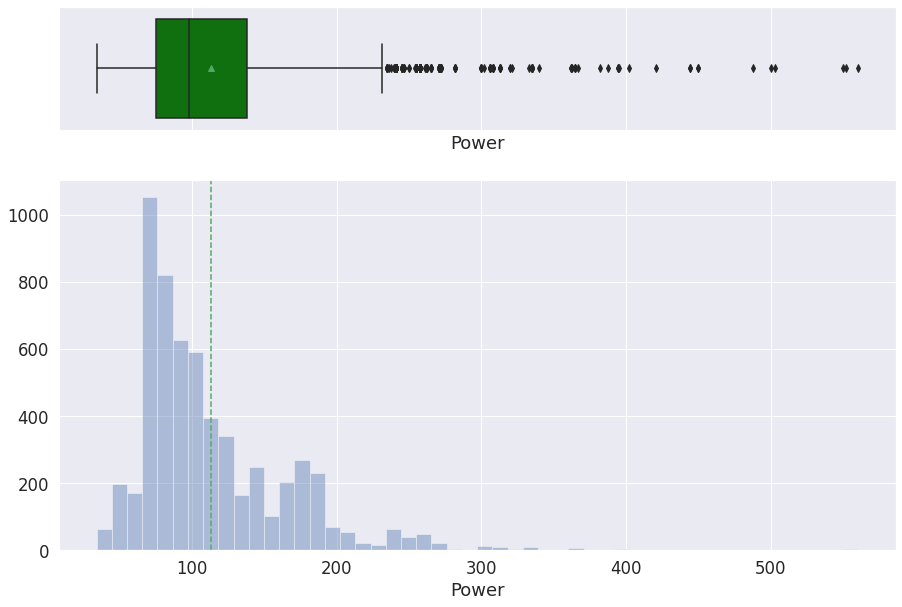

In [22]:
histogram_boxplot(df["Power"])

### Observation:
- Power is skewed to the right and there are many upper outliers

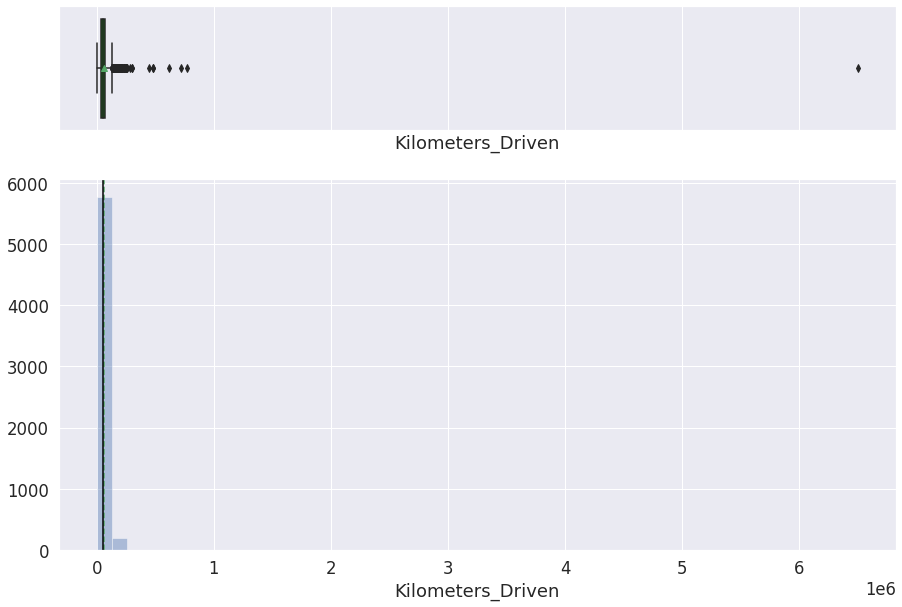

In [23]:
histogram_boxplot(df["Kilometers_Driven"])

In [24]:
df.loc[df["Kilometers_Driven"]>6e6]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Mileage_Figure,Mileage_Unit
2030,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97 kmpl,2993.0,258.0,5.0,65.0,15.97,kmpl


### Observation:
- Kilometer_Driven skewed to the right with uppper outliers.
- Specifically,there is a extreme outlier with a car having driven 6.5 million killometers.
- This data point is probably a record in error and will be eliminated during outlier treatment

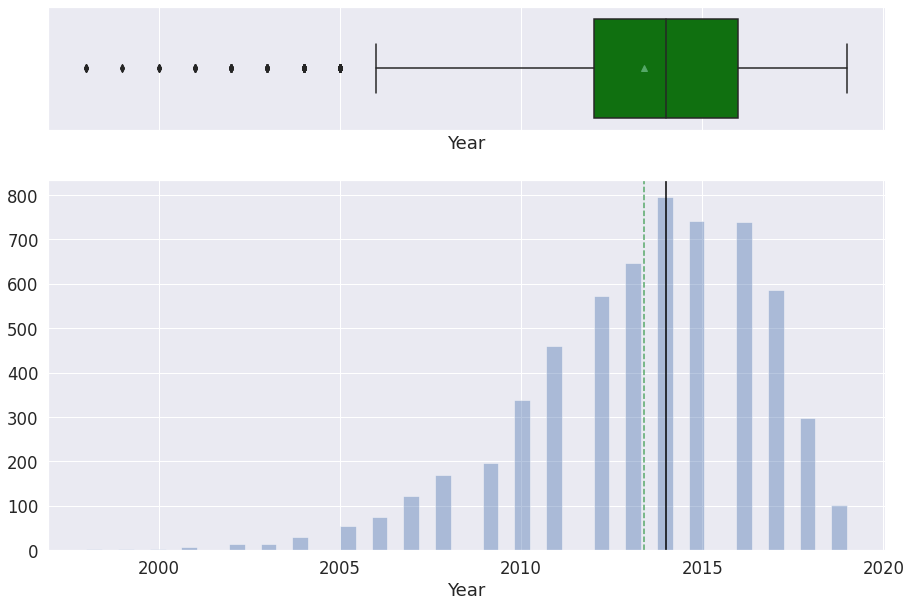

In [25]:
histogram_boxplot(df["Year"])

### Observation:
- Year skewed to the left with outliers on the left as well.
- This means that the cars sold frequently are newer than the old ones

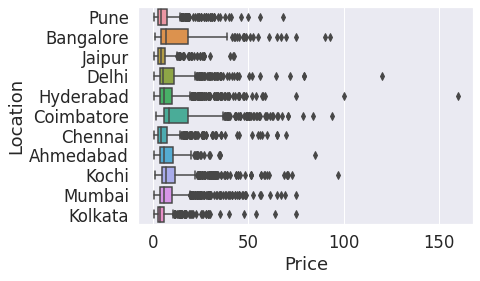

In [26]:
sns.boxplot(df["Price"], df["Location"]);

In [27]:
# From above boxplot we hypothesize that Location does not affect price. We will drop it
# We will also drop Name for the same reason.
# Droping mileage also because we have created Mileage_Figure which is numeric column

In [28]:
df = df.drop(columns=["Name", "Location", "Mileage"])

In [29]:
# Extracting names of numerical columns 
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

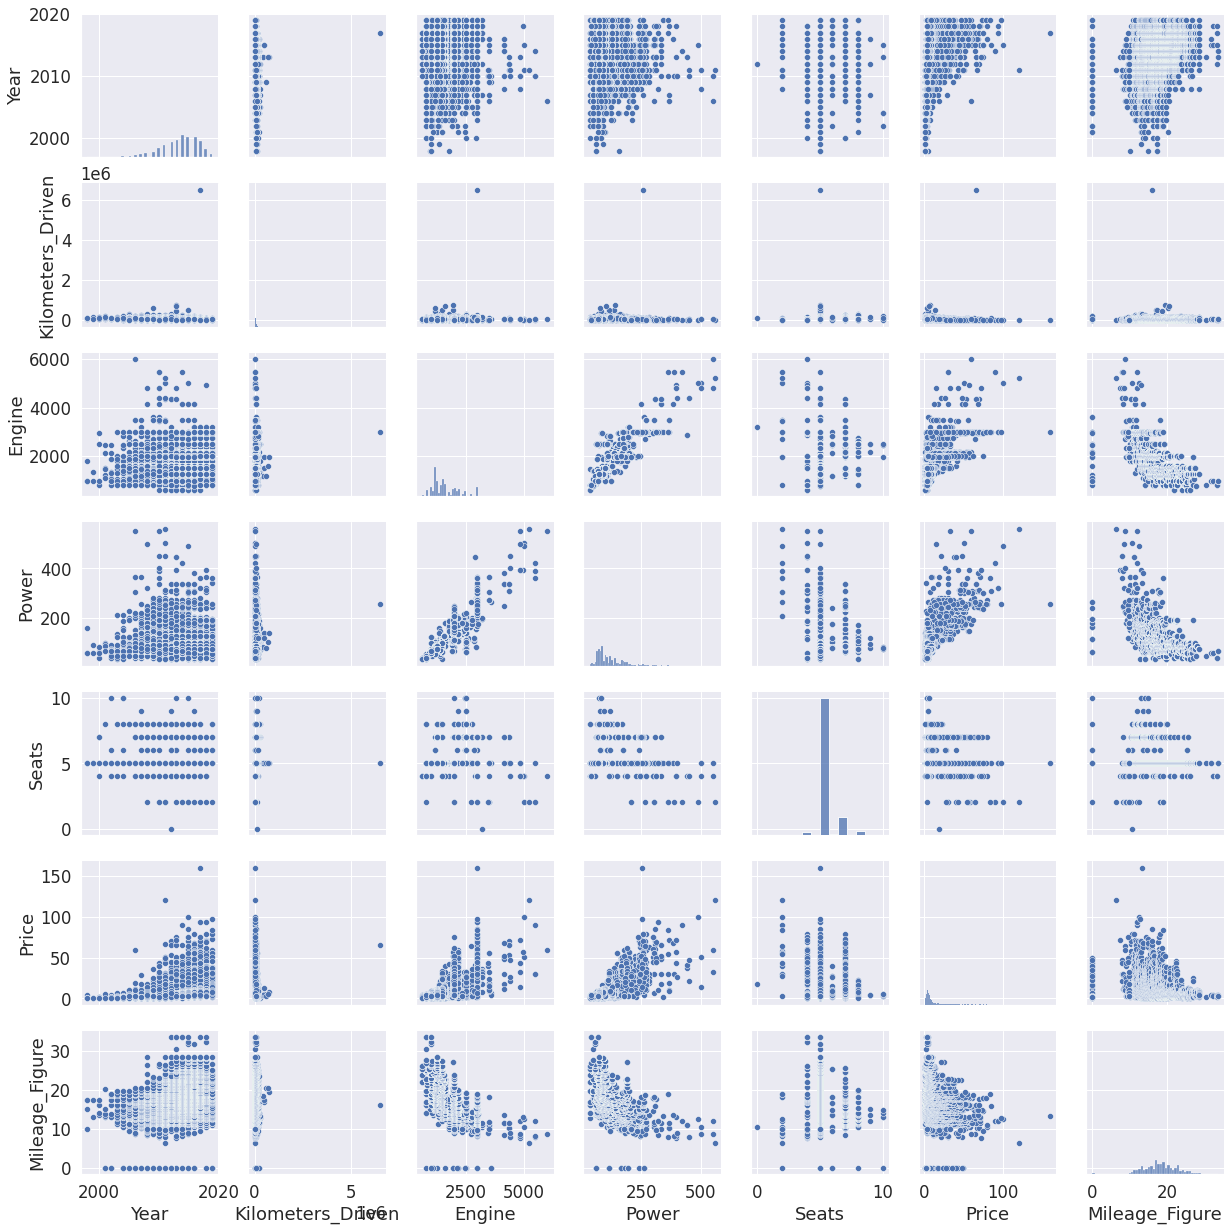

In [30]:
sns.pairplot(df[numeric_cols])

In [31]:
# None numeric columns
non_numeric_cols = df.select_dtypes(include=object).columns.tolist()

Column Fuel_Type
{'Diesel': 3195, 'Petrol': 2714, 'CNG': 56, 'LPG': 10}


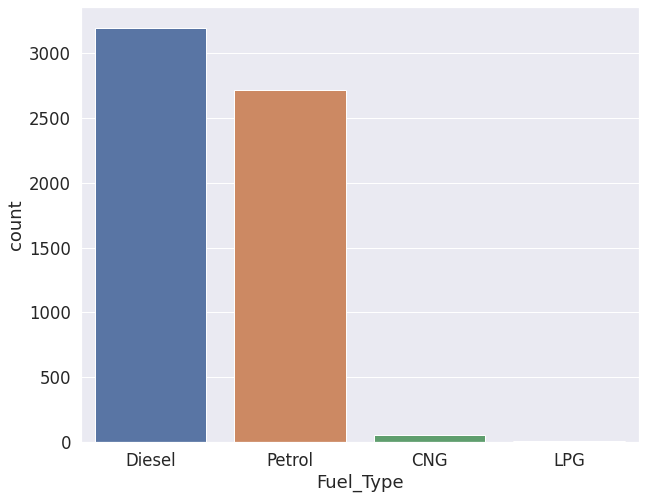

Column Transmission
{'Manual': 4266, 'Automatic': 1709}


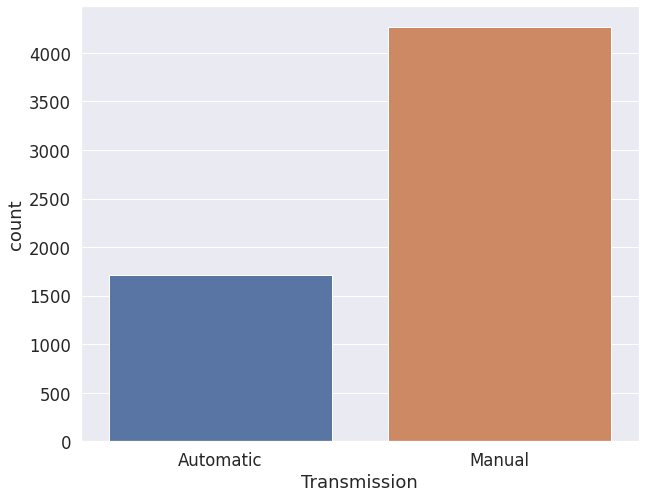

Column Owner_Type
{'First': 4903, 'Second': 953, 'Third': 111, 'Fourth & Above': 8}


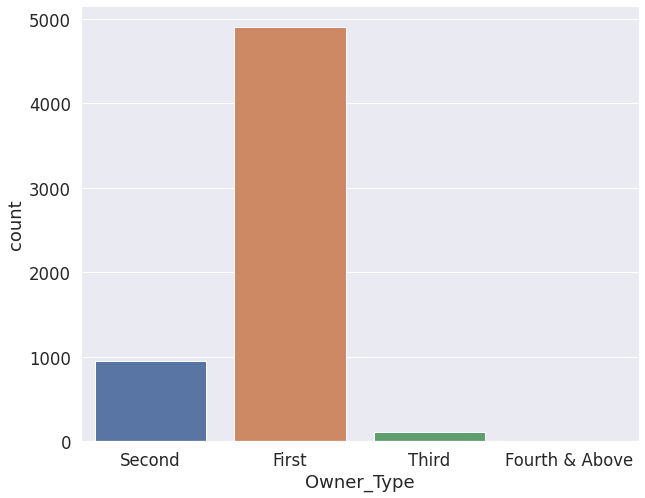

Column Mileage_Unit
{'kmpl': 5909, 'km/kg': 66}


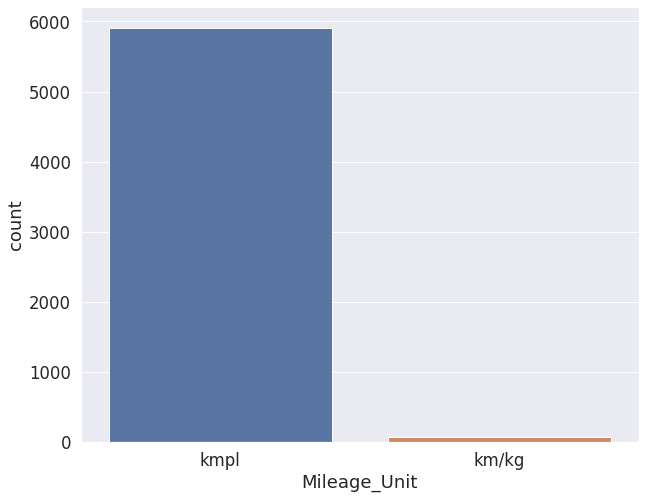

In [32]:
#value counts for categorical cols
for col in non_numeric_cols:
    print("Column",col)
    print(dict(df[col].value_counts()))
    plt.figure(figsize=(10,8))
    sns.countplot(df[col])
    plt.show()

<AxesSubplot:xlabel='Price', ylabel='Owner_Type'>

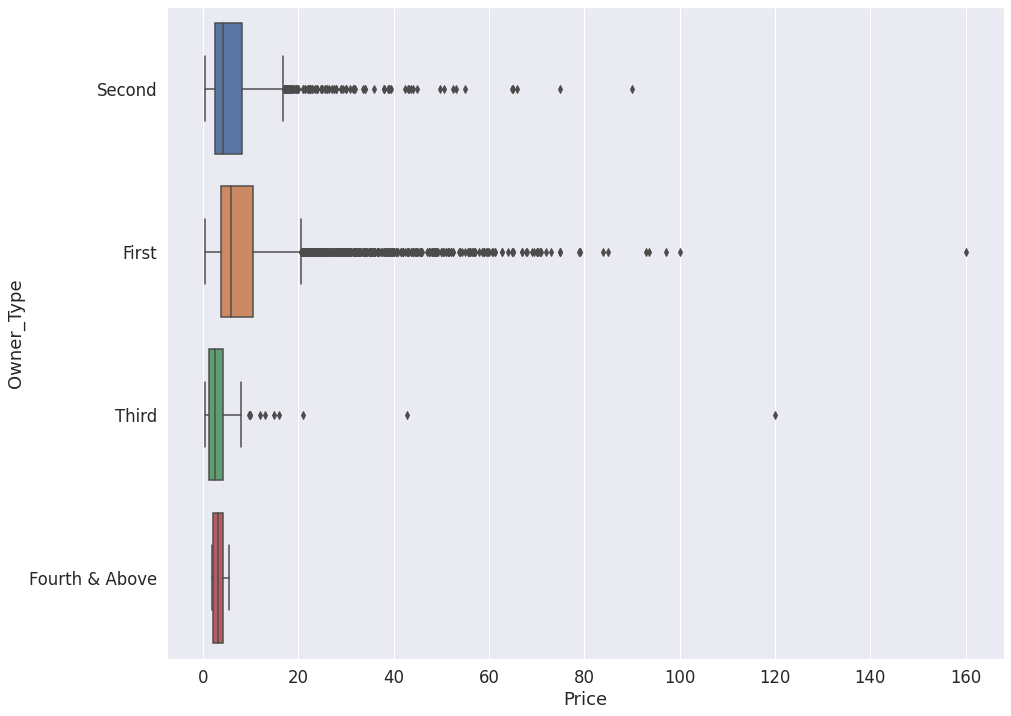

In [33]:
plt.figure(figsize=(15,12))
sns.boxplot(df["Price"],df["Owner_Type"])

In [34]:
df[["Price","Owner_Type"]].groupby("Owner_Type").mean()

,Price
Owner_Type,
First,9.979721
Fourth & Above,3.396250
Second,7.622644
Third,4.956937


<AxesSubplot:xlabel='Price', ylabel='Transmission'>

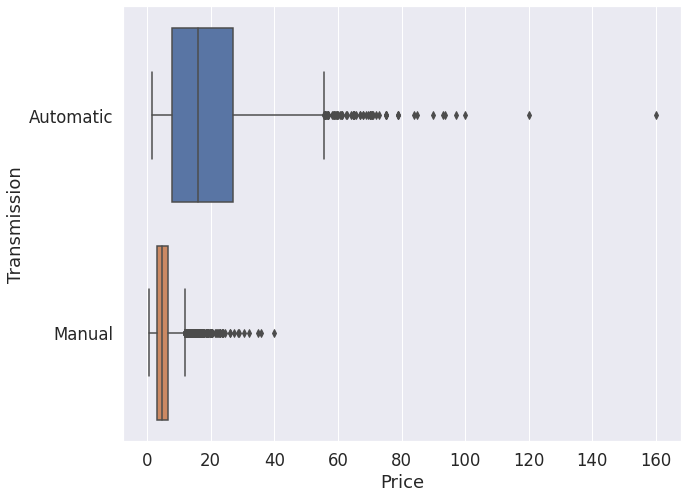

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(df["Price"],df["Transmission"])

<AxesSubplot:xlabel='Price', ylabel='Fuel_Type'>

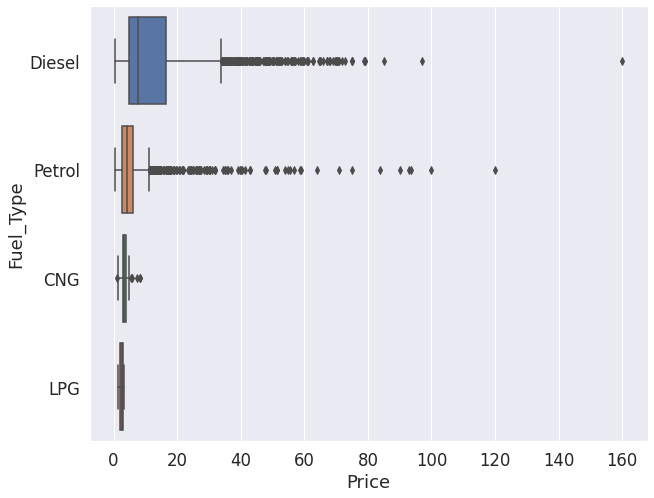

In [36]:
plt.figure(figsize=(10,8))
sns.boxplot(df["Price"],df["Fuel_Type"])

In [37]:
df[["Price","Fuel_Type"]].groupby("Fuel_Type").mean()

,Price
Fuel_Type,
CNG,3.516786
Diesel,12.839934
LPG,2.487000
Petrol,5.721054


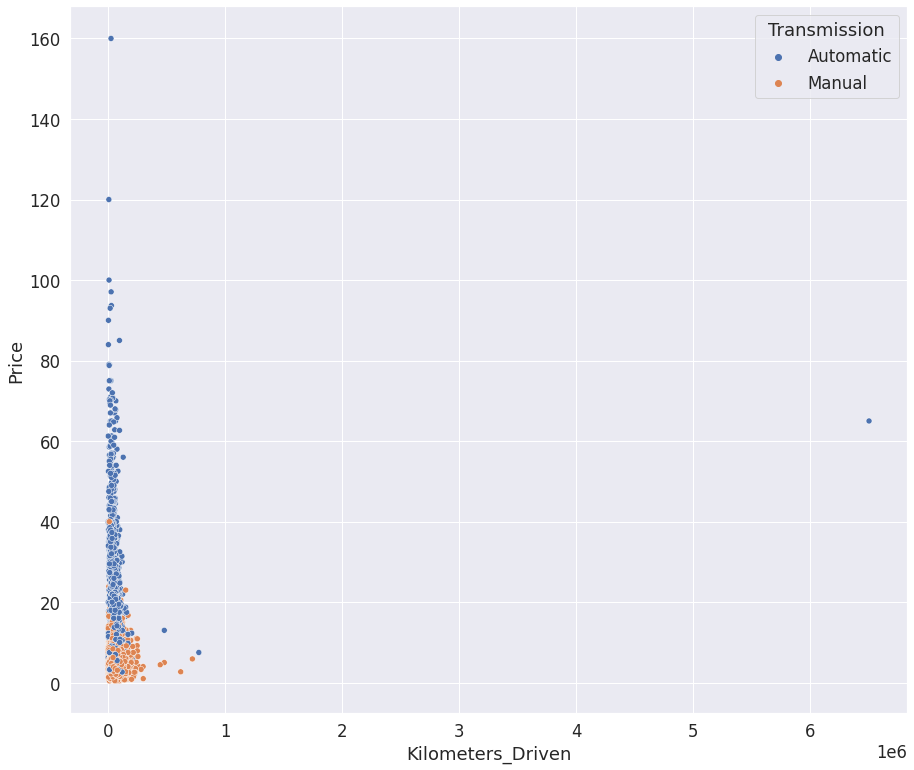

In [38]:
# Lets look visualize the relationship between Km Driven, Price and Transmission 
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Kilometers_Driven', hue='Transmission', data=df);

### Observation:

- Automatic cars are more priced. The car that is recorded to have been driven for 6.5M km is way out of the distribution

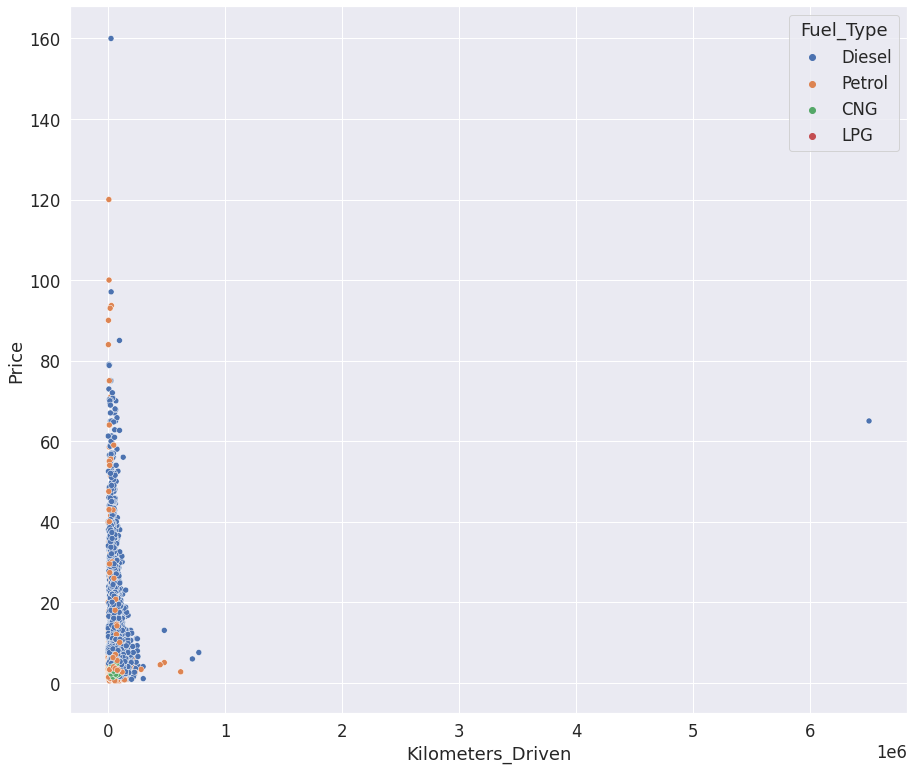

In [39]:
# Lets look visualize the relationship between Km Driven, Price and Fuel_Type
plt.figure(figsize=(15,13))
sns.scatterplot(y='Price', x='Kilometers_Driven', hue='Fuel_Type', data=df);

### Observation:
- Diesel-powered cars are most expensive.
- For all the cars, the prices redices as Kilometers_Driven increase

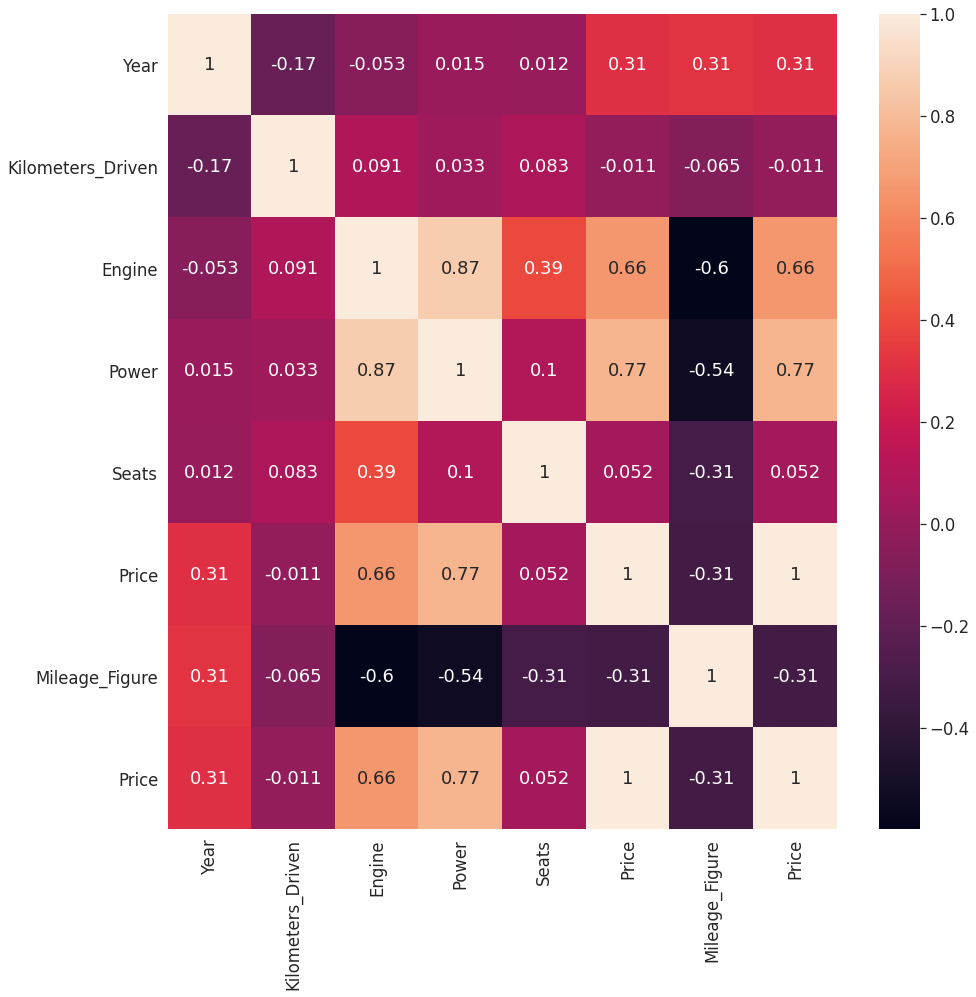

In [40]:
plt.figure(figsize=(15,15))
sns.heatmap(df[numeric_cols+["Price"]].corr(), annot=True)
plt.show()

## Observation ( Focus on Price)
- There is a strong positive correlation between Price and Engine, Price and Engine with 0.66 and 0.77.
- A weak positive correlation with Year (0.31) and a weak negative correlation with Mileage_Figure.

# FEATURE ENGINEERING

In [41]:
#Before treating outliers

In [42]:
numeric_cols.remove("Price")

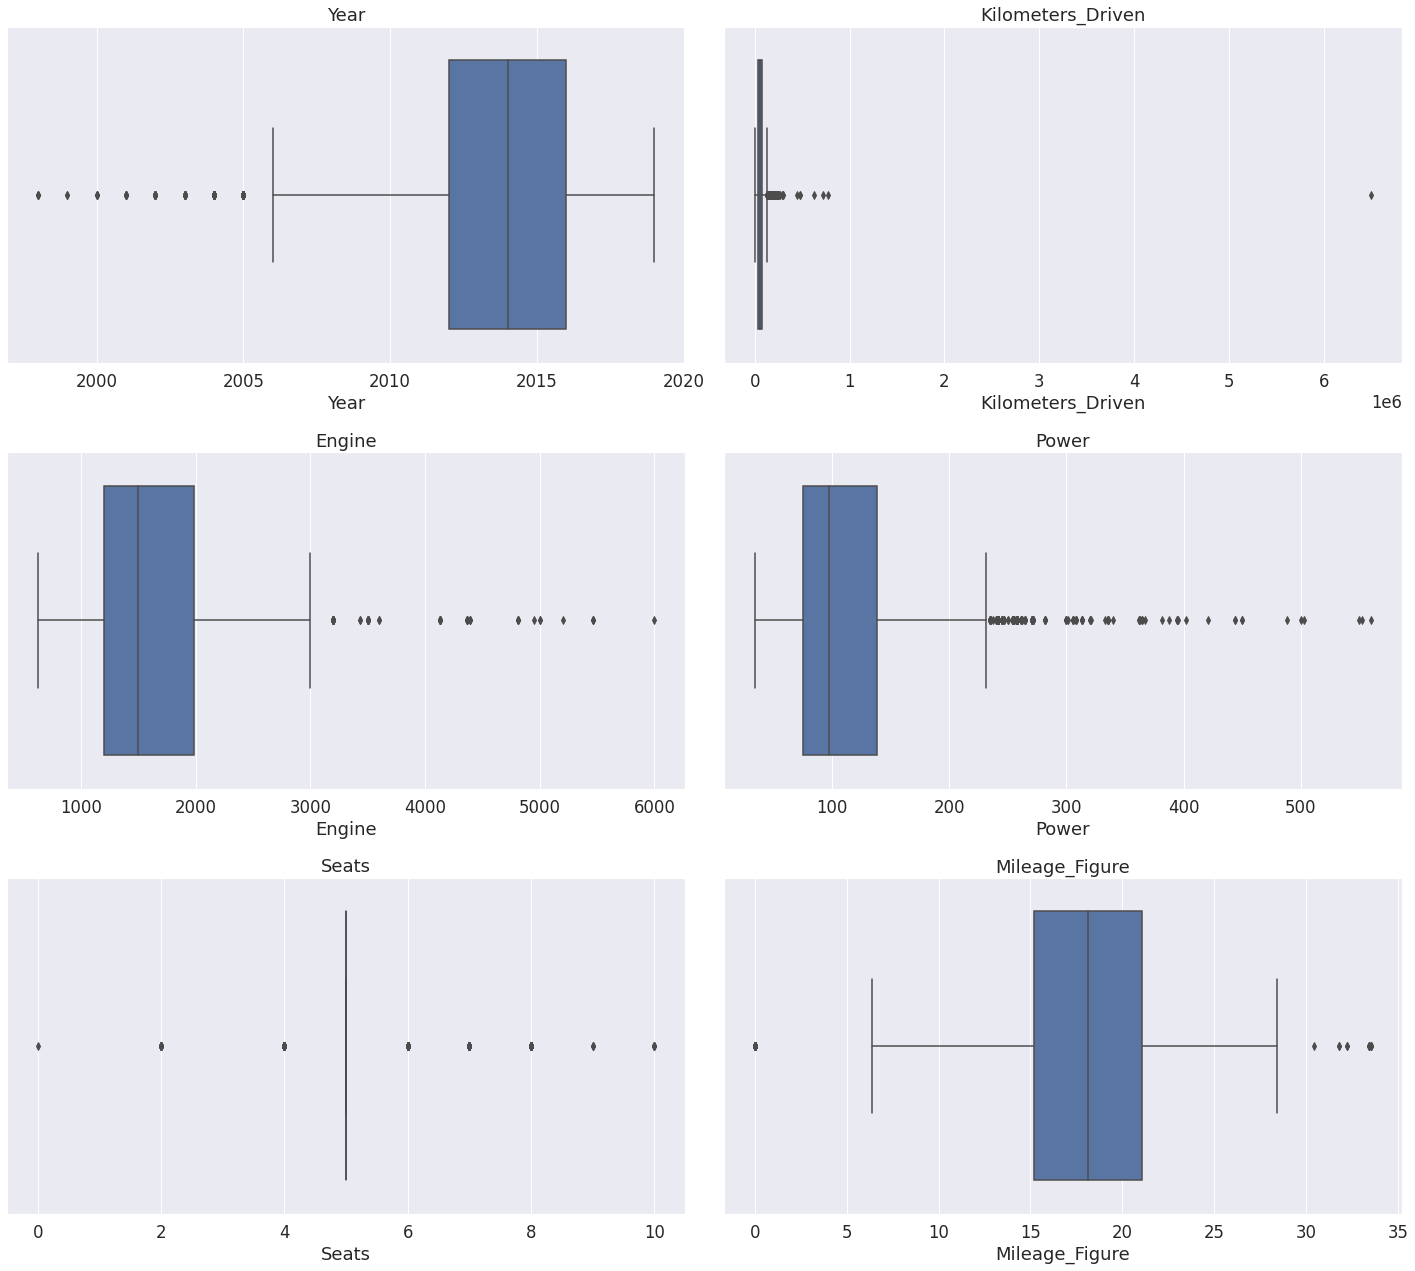

In [43]:
plt.figure(figsize=(20,18))
for index, col in enumerate(numeric_cols):
    plt.subplot(3,2,index+1)
    sns.boxplot(df[col],whis=1.5)
    plt.tight_layout()
    plt.title(col)

In [44]:
# Treating outliers

In [45]:
# Function for treating outliers - upper outliers are assigned the value for the upper whisker and the lower
# outliers are assigned the value of the lower whisker.
def TreatingOutliers(df, col_name):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_w = q1 - (1.5*iqr)
    upper_w = q3 + (1.5*iqr)
    df[col] = np.clip(df[col], lower_w, upper_w)
    return df

In [46]:
for col in numeric_cols:
    TreatingOutliers(df,col)

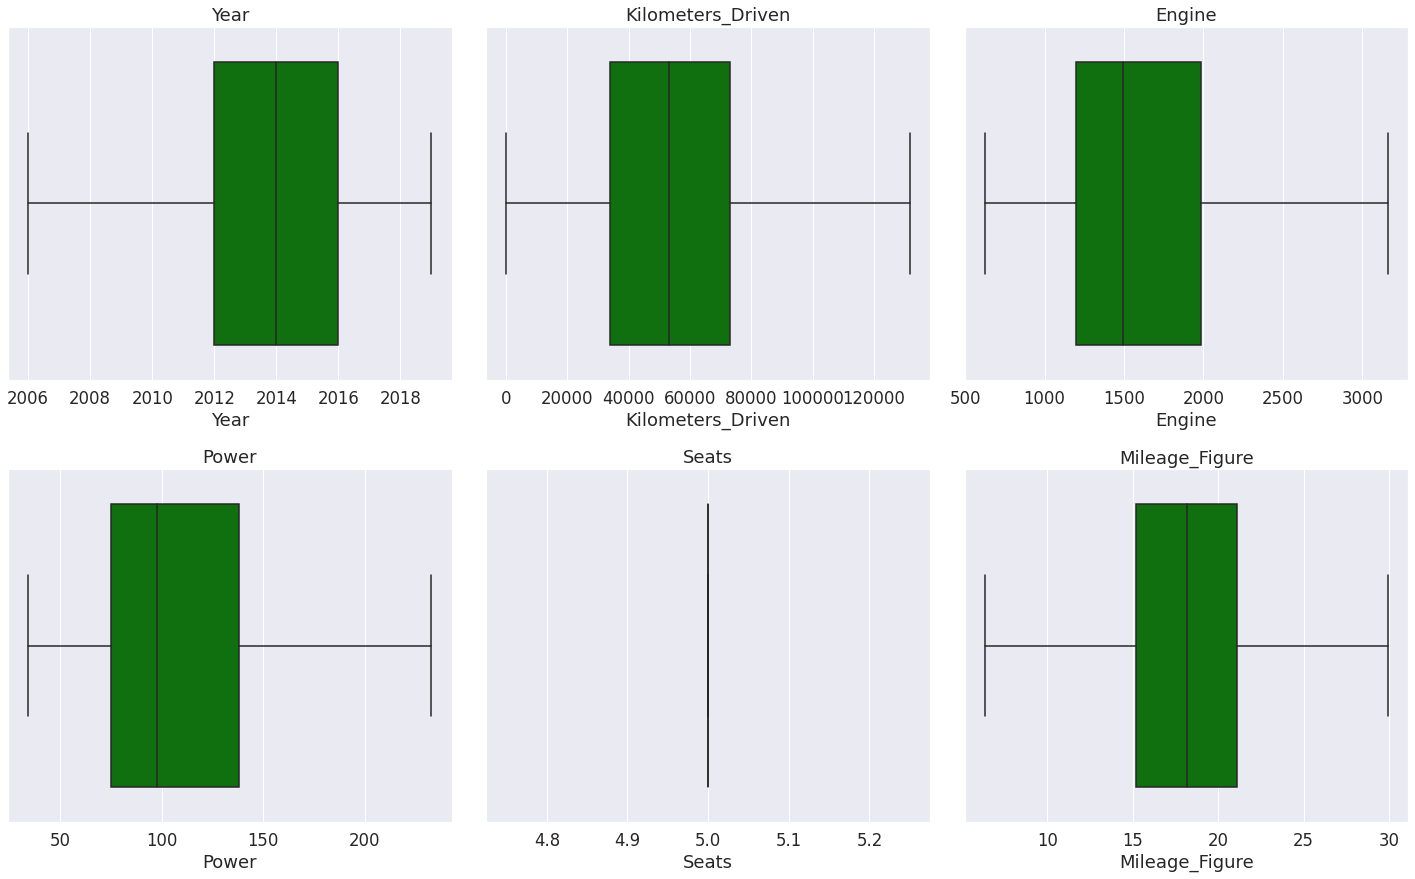

In [47]:
plt.figure(figsize=(20,18))
for index, col in enumerate(numeric_cols):
    plt.subplot(3,3,index+1)
    sns.boxplot(df[col],whis=1.5, color="green")
    plt.tight_layout()
    plt.title(col)

In [48]:
# Recall that we have np.nan values in Power columns. We want to impute those.
df.loc[df["Power"].isna()].head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_Figure,Mileage_Unit
36,2006,87591,Petrol,Manual,First,1086.0,NaN,5.0,1.30,6.35,kmpl
37,2006,99000,Petrol,Manual,First,1086.0,NaN,5.0,1.75,6.35,kmpl
38,2006,58000,Petrol,Manual,Second,1086.0,NaN,5.0,1.50,6.35,kmpl
39,2010,42021,Diesel,Manual,First,1968.0,NaN,5.0,5.45,6.35,kmpl
40,2012,50243,Petrol,Manual,First,1086.0,NaN,5.0,3.35,6.35,kmpl


In [49]:
power_median = df["Power"].median()

In [50]:
# Replace NaN values with the median
df["Power"].fillna(power_median,inplace=True)

In [51]:
df.loc[df["Power"].isna()]

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Engine,Power,Seats,Price,Mileage_Figure,Mileage_Unit


# MODEL BUILDING

In [52]:
# Model building - define dependent variable, y and Independent variables, X.
X = df.drop(["Price","Mileage_Unit"],axis=1)
y = df["Price"]

In [53]:
print(X.shape)
print(y.shape)

(5975, 9)
(5975,)


In [54]:
#Dummy variables for categorical variables
X = pd.get_dummies(X, columns=["Fuel_Type","Transmission","Owner_Type"], drop_first=True)
X.head()

,Year,Kilometers_Driven,Engine,Power,Seats,Mileage_Figure,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2012,85000,2179.0,115.0,5.0,6.35,1,0,0,0,0,1,0
1,2010,125000,2179.0,115.0,5.0,6.35,1,0,0,0,0,1,0
2,2012,119203,2179.0,115.0,5.0,6.35,1,0,0,0,0,0,0
3,2013,72000,2179.0,115.0,5.0,6.35,1,0,0,0,0,0,0
4,2013,46000,2179.0,115.0,5.0,6.35,1,0,0,0,0,1,0


In [55]:
X.columns

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats',
       'Mileage_Figure', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [56]:
#split the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
X_train.head()

,Year,Kilometers_Driven,Engine,Power,Seats,Mileage_Figure,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
6431,2018,2000,1199.0,83.83,5.0,23.84,0,0,1,0,0,0,0
2193,2016,19148,1197.0,85.00,5.0,16.10,0,0,1,1,0,0,0
3167,2013,27075,1496.0,88.73,5.0,17.60,0,0,1,1,0,0,0
3530,2012,131638,1991.0,147.90,5.0,18.10,1,0,0,0,0,0,0
6210,2012,32048,1461.0,63.10,5.0,23.08,1,0,0,1,0,0,0


In [58]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)                             

Intercept of the linear equation: -1642.5952053192857

COefficients of the equation are: [ 8.14436558e-01 -4.55220562e-05  3.40798590e-03  1.17783613e-01
 -6.93889390e-16  1.13536553e-02 -1.06559173e+00  2.57929015e+00
 -2.44682153e+00 -3.20315815e+00 -8.67613603e-01  2.16987833e-01
  3.92138128e-01]


In [59]:
# Lets us build linear regression model using statsmodel 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=54)

olsmod_train = sm.OLS(y_train, X_train)
ols_train = olsmod_train.fit()
print(ols_train.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     627.5
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:31:04   Log-Likelihood:                -11546.
No. Observations:                3585   AIC:                         2.312e+04
Df Residuals:                    3572   BIC:                         2.320e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

### Observation
- P value of a variable indicates if the variable is significant or not. If we consider significance level to be 0.05 (5%) then any variable with p-values less than 0.05 would be considered significant. Examples: Year, Kilometers_Driven, Power, Seats and Engine.
- Negative values of coefficient shows that, Life expectancy deceases with their increase. 
- Positive values of coefficient shows that, Life expectancy inceases with their increase.
- But these variables might contain Multicollinearity (from the footnote) which affects the p values, so we first need to deal with multicollinearity and then look for p values 


## Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects how fit the model is.
    - R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for Adj. R-squared is **0.67.8**, which is satisfactory!
2. **const coefficient** is the Y-intercept.
    - It means that if all the dependent variables (features: like Year, Seats, Kilometers_Driven, etc...) coefficients are zero, then the expected output (i.e., the Price) would be equal to the const coefficient.
    - In our case, the value for const coeff is **-1455.15**. A negative value in this case may be insignificant in terms of interpretion.

3. **Power coeff**: It represents the change in the output Y due to a change of one unit in the Power (everything else held constant). In our case, as the Power increase by 1bhp the Price increases by 0.1291 currency units keeping all the other features constant.
4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.
5. **P >|t|**: It is p-value.
   
   * Pr(>|t|) : For each independent feature there is a null hypothesis and alternate hypothesis 

    Ho : Independent feature is not significant 

    Ha : Independent feature is that it is significant

Pr(>|t|) gives P-value for each independent feature to check that null hypothesis. we are considering 0.05 (5%) as significance level
  - A p-value of less than 0.05 is considered to be statistically significant.

   
6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

In [60]:
olsmod_test = sm.OLS(y_test, X_test)
ols_test = olsmod_test.fit()
print(ols_test.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     368.6
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:31:07   Log-Likelihood:                -8061.5
No. Observations:                2390   AIC:                         1.615e+04
Df Residuals:                    2377   BIC:                         1.622e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

In [61]:
# Prediction and other metrics: MAE and RMSE
train_pred = ols_train.predict(X_train)
test_pred = ols_test.predict(X_test)


# Mean Absolute Error on test
print("MAE for train data: ",mean_absolute_error(y_train, train_pred))
# Mean Absolute Error on test
print("MAE for test data: ",mean_absolute_error(y_test, test_pred))


# RMSE on train data
print("RMSE for train data: ",mean_squared_error(y_train, train_pred)**0.5)
# RMSE on test data
print("RMSE for test data", mean_squared_error(y_test, test_pred)**0.5)

MAE for train data:  3.7125454358314993
MAE for test data:  4.204201367882399
RMSE for train data:  6.0597078958434825
RMSE for test data 7.057322769394372


## Mileage_Figure has p-value > 0.05 and therefore not significant and therefore we will drop it and and fit the model again.

# FINE TUNING

In [62]:
# Lets us build linear regression model using statsmodel 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X1 = X.drop(['Mileage_Figure'],axis=1)
X1 = sm.add_constant(X1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.3, random_state=54)

olsmod_train1 = sm.OLS(y_train1, X_train1)
ols_train1 = olsmod_train1.fit()
print(ols_train1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     769.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:31:49   Log-Likelihood:                -13623.
No. Observations:                4182   AIC:                         2.727e+04
Df Residuals:                    4170   BIC:                         2.735e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

In [133]:
olsmod_test1 = sm.OLS(y_test1, X_test1)
ols_test1 = olsmod_test1.fit()
print(ols_test1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     163.7
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:24:27   Log-Likelihood:                -5994.6
No. Observations:                1793   AIC:                         1.203e+04
Df Residuals:                    1771   BIC:                         1.215e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Year                  

# TESTING LINEAR REGRESSION ASSUMPTIONS

Now we'll check rest of the assumptions on model - ols_test1
- No multicollinearity
- Mean of residuals should be 0
- Linearity of variables
- Normality of error terms
- No Heteroscedacity


### TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity the linear model, The coefficients that the model suggests are unreliable.

* There are different ways of detecting(or  testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression parameter estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βkis “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5 or is close to exceeding 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.

In [63]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

Year                              1.799447
Kilometers_Driven                 1.711398
Engine                            6.589936
Power                             5.347558
Seats                        762217.943202
Mileage_Figure                    2.970489
Fuel_Type_Diesel                 27.678625
Fuel_Type_LPG                     1.185744
Fuel_Type_Petrol                 28.342690
Transmission_Manual               1.937738
Owner_Type_Fourth & Above         1.009746
Owner_Type_Second                 1.126939
Owner_Type_Third                  1.071146
dtype: float64



### Observation: 
- Seats shows unexpected multicollinearity index. We will drop this next.
- Fuel_Type_Diesel and Fuel_Type_Petrol seems to be collinear but we cannot drop because they are dummies.
- Engine and Power showing some collinearity but it is moderate so we will not drop

In [66]:
# Lets us build linear regression model using statsmodel 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X2 = X.drop(['Mileage_Figure',"Seats"],axis=1)
X2 = sm.add_constant(X2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=54)

olsmod_train2 = sm.OLS(y_train2, X_train2)
ols_train2 = olsmod_train2.fit()
print(ols_train2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     769.1
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:43:34   Log-Likelihood:                -13623.
No. Observations:                4182   AIC:                         2.727e+04
Df Residuals:                    4170   BIC:                         2.735e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

## Observation:

- After droping Seats the perfomance of the model does not change much.

## Mean of Residuals

In [69]:
residual= ols_train.resid
np.mean(residual)
# The mean of residuals is close to zero. The assumption is met.

-4.747527460264032e-12

### TEST FOR LINEARITY 

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs Residuals, if they don’t follow any pattern, they we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try to transform the variables and make the relationships linear

In [70]:
residual = ols_train1.resid
fitted = ols_train1.fittedvalues #predicted values

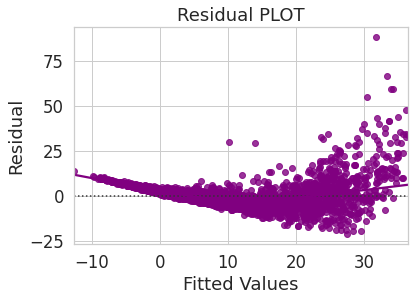

In [71]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="purple",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

In [72]:
# The plot shows some pattern but seems tolerable

### TEST FOR NORMALITY

**What is the test?**

* Error terms/Residuals should be normally distributed

* If the error terms are non- normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What do non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to Check the Normality?**

* It can be checked via QQ Plot, Residuals following normal distribution will make a straight line plot otherwise not.

* Other test to check for normality : Shapiro-Wilk test.

**What is the residuals are not-normal?**

* We can apply transformations like log, exponential, arcsinh etc as per our data

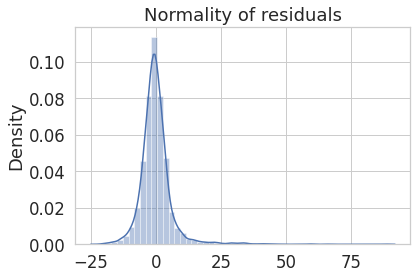

In [73]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

In [74]:
# Again the residual doesn't not seem normal but tolerabel

#### The QQ plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.

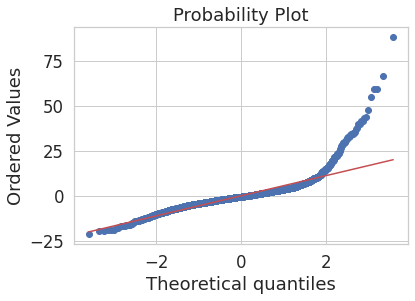

In [76]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

# The QQ plot suggest normally distributed residuals. Assumptions met.

In [78]:
# H0: Residuals normally distributed
# H1: Residuals not normally distributed
stats.shapiro(residual)

# Observation: We reject null and conclude that the residuals are not normally distributed at 5% significance level

ShapiroResult(statistic=0.788292646408081, pvalue=0.0)

### TEST FOR HOMOSCEDASTICITY

* Test -goldfeldquandt test

* Homoscedacity - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* Heteroscedacity - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

Null hypothesis : Residuals are homoscedastic

Alternate hypothesis : Residuals have hetroscedasticity

In [79]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train1)
lzip(name, test)

# Conlusion: Fail to reject Null hypothesis and conclude that the residuals are homoscedastic. Assumption met.

[('F statistic', 0.7540484282285822), ('p-value', 0.9999999999338238)]

# Forward Feature Selection 
### This is another way of choosing significant figures


In [80]:
#X_train_new = X_train1.drop('const', axis = 1)

In [81]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [82]:
clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = X.shape[1],forward=True,
           floating=False, scoring= 'r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-02-18 23:50:32] Features: 1/13 -- score: 0.571209713827198[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-02-18 23:50:32] Features: 2/13 -- score: 0.6555198837269935[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-02-18 23:50:32] Features: 3/13 -- score: 0.662631178099564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

In [93]:
clf = LinearRegression()

# # Build step forward feature selection
sfs1 = sfs(clf,k_features = 9,forward=True,
           floating=False, scoring='r2',
           verbose=2,
           cv=5)

 # Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2021-02-18 23:51:58] Features: 1/9 -- score: 0.571209713827198[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2021-02-18 23:51:58] Features: 2/9 -- score: 0.6555198837269935[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2021-02-18 23:51:58] Features: 3/9 -- score: 0.662631178099564[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [94]:
# Now Which features are important?
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[0, 1, 2, 3, 4, 7, 8, 9, 11]


In [95]:
X_train.columns[feat_cols]

Index(['Year', 'Kilometers_Driven', 'Engine', 'Power', 'Seats',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Transmission_Manual',
       'Owner_Type_Second'],
      dtype='object')

In [97]:
# As expected variables such as Mileage_Figure was not found important with this second method.

# FITTING FINAL MODEL

In [98]:
X_train_final = X_train[X_train.columns[feat_cols]]

In [99]:
#Creating new x_test with the same 18 variables that we selected for x_train
X_test_final = X_test[X_train_final.columns]

In [100]:
#Fitting linear model

from sklearn.linear_model import LinearRegression
linearregression = LinearRegression()                                    
linearregression.fit(X_train_final, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predicted = linearregression.predict(X_train_final)
pred = linearregression.predict(X_test_final)                              

Intercept of the linear equation: -1418.0516309733732

COefficients of the equation are: [ 7.02862507e-01 -4.54302094e-05  2.82990625e-03  1.18967288e-01
  4.44089210e-16  2.13547501e+00 -1.72322855e+00 -2.92824143e+00
 -6.17993898e-01]


In [102]:
# Lets us build linear regression model using statsmodel- Train data
import statsmodels.api as sm

olsmod_train3 = sm.OLS(y_train, X_train_final)
ols_train3 = olsmod_train3.fit()
print(ols_train3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                     940.9
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:55:20   Log-Likelihood:                -11548.
No. Observations:                3585   AIC:                         2.311e+04
Df Residuals:                    3576   BIC:                         2.317e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.7029    

In [104]:
olsmod_test3 = sm.OLS(y_test, X_test_final)
ols_test3 = olsmod_test3.fit()
print(ols_test3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     552.4
Date:                Thu, 18 Feb 2021   Prob (F-statistic):               0.00
Time:                        23:56:12   Log-Likelihood:                -8063.4
No. Observations:                2390   AIC:                         1.614e+04
Df Residuals:                    2381   BIC:                         1.620e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Year                    0.9433    

In [105]:
# R2 Squared: on train and test
print('r2 score on train data :', r2_score(y_train, predicted))
print('r2 score on test data :', r2_score(y_test, pred))

r2 score on train data : 0.677925889388134
r2 score on test data : 0.6430108046978569


In [106]:
# RMSE on train and test data
print('rmse on train data :', mean_squared_error(y_train, predicted)**0.5)
print('rmse on test data :', mean_squared_error(y_test, pred)**0.5)

rmse on train data : 6.062748812748165
rmse on test data : 7.1317888745546005


# ===================== END =====================